In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [13]:
file = open("Files/CR-shortanswer.csv")
reader_contents = pd.read_csv(file, header = 0)

Collected issue reports from questionnaire Q3-Q8 (SE) and built word clouds. 

In [14]:
issues = reader_contents[["Q13", "Q4", "Q6", "Q7", "Q8"]]
issues = issues[2:]

Collected suggestions and built word clouds from Q9 (SE).

In [15]:
suggestions = reader_contents[["Q9"]]
suggestions = suggestions[2:]

Collected good features from the CR and built a word cloud from Q10 (SE).

In [16]:
good_features = reader_contents[["Q10"]]
good_features = good_features[2:]

In [17]:
def word_cloud(lis):
    information_store = []
    
    for i in lis:
        for q in lis[i]:
            if pd.isna(q) != True:
                information_store.append([q])
    text = ""
    
    for row in information_store:
        for word in row :
            text = text + " " + word
    
    return text

In [18]:
wordcloud_1 = WordCloud(width=480, height=480, background_color="pink").generate(word_cloud(issues))
wordcloud_2 = WordCloud(width=480, height=480, background_color="green").generate(word_cloud(suggestions))
wordcloud_3 = WordCloud(width=480, height=480, background_color="black").generate(word_cloud(good_features))

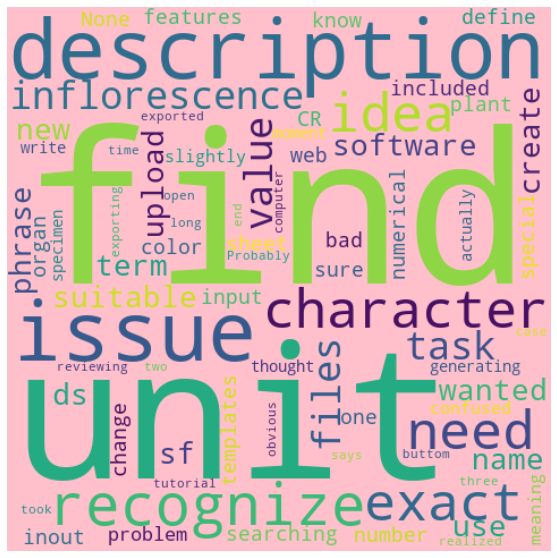

In [19]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_1, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [20]:
plt.savefig(os.path.join('Pics/wc1.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

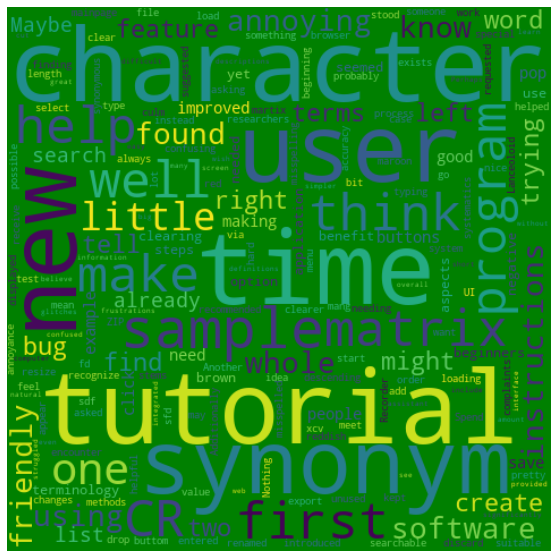

In [21]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_2, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [22]:
plt.savefig(os.path.join('Pics/wc2.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

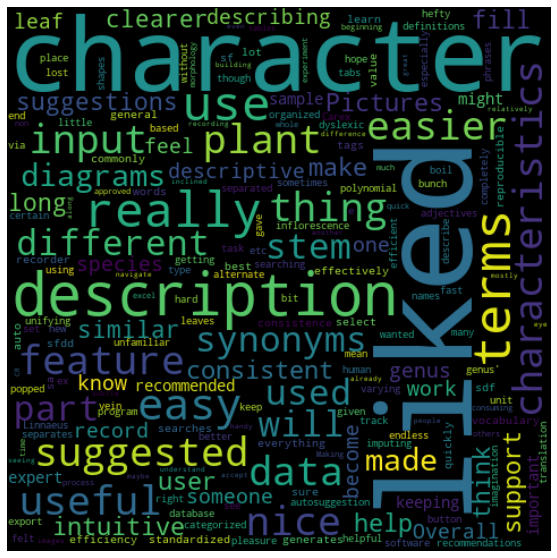

In [23]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_3, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [24]:
plt.savefig(os.path.join('Pics/wc3.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>